In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [3]:
audio_data = "wav\\129_a.wav"
x1, sr = librosa.load(audio_data, sr=None, mono=True, offset=0.0, duration=0.8)
x2, sr = librosa.load(audio_data, sr=None, mono=True, offset=0.4, duration=1.2)
x3, sr = librosa.load(audio_data, sr=None, mono=True, offset=0.8, duration=1.6)
x4, sr = librosa.load(audio_data, sr=None, mono=True, offset=1.2, duration=None)
x, sr = librosa.load(audio_data, sr=None, mono=True, offset=0.0, duration=None)

print(type(x1), type(sr))
#<class 'numpy.ndarray'> <class 'int'>
print(x1.shape,x2.shape, x3.shape, x4.shape, sr)
#(94316,) 22050


<class 'numpy.ndarray'> <class 'int'>
(35280,) (52920,) (70560,) (68908,) 44100


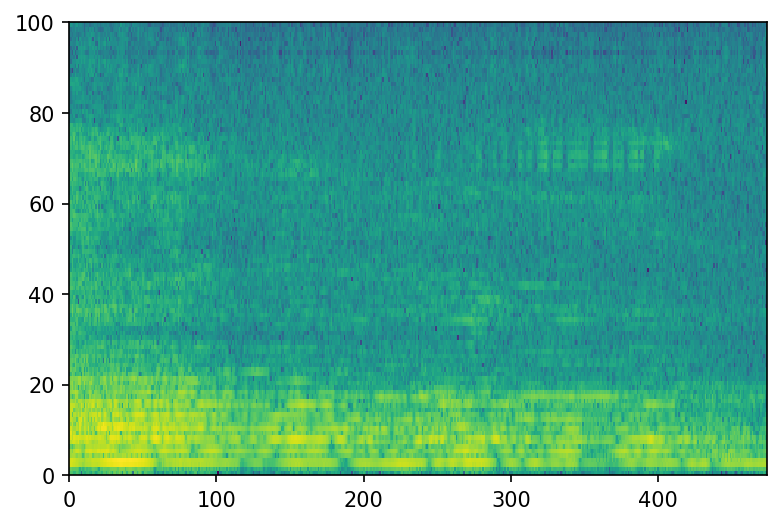

In [5]:
f_size = int(512)
h_size = int(f_size/2)
freq = np.linspace(0,sr/2,h_size)


Ln=x.shape[0]
frame_num = int((Ln-f_size)/h_size + 1)

wnd = np.hamming(f_size)

spec = np.zeros((h_size,frame_num))

for N in range(frame_num):
    x_frame = x[h_size*N: h_size*N + f_size]
    x_wnd = x_frame*wnd

    X = np.fft.fft(x_wnd)
    X_abs = np.abs(X[0:h_size])

    spec[:,N] = np.log(X_abs)
    # X2 = np.fft.fft(x_frame)
    # X2_abs = np.abs(X2)

    # plt.subplots(dpi=150)
    # plt.subplot(211)
    # plt.plot(x_frame)
    # plt.plot(x_wnd)
    # plt.subplot(212)
    # # plt.plot(freq, X_abs[0:h_size])
    # plt.plot(freq, np.log(X2_abs[0:h_size]))
    # plt.plot(freq, np.log(X_abs[0:h_size]))
    
plt.subplots(dpi=150)
plt.pcolor(spec[0:100,:],shading='flat')   


In [8]:
import IPython.display as ipd
ipd.Audio(audio_data)

<Figure size 1008x360 with 0 Axes>

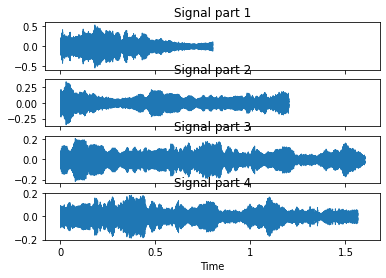

In [5]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
fig, ax = plt.subplots(nrows=4, sharex=True)
librosa.display.waveshow(x1, sr=sr, ax=ax[0])
ax[0].set(title='Signal part 1')
ax[0].label_outer()
librosa.display.waveshow(x2, sr=sr, ax=ax[1])
ax[1].set(title='Signal part 2')
ax[1].label_outer()
librosa.display.waveshow(x3, sr=sr, ax=ax[2])
ax[2].set(title='Signal part 3')
ax[2].label_outer()
librosa.display.waveshow(x4, sr=sr, ax=ax[3])
ax[3].set(title='Signal part 4')
ax[3].label_outer()

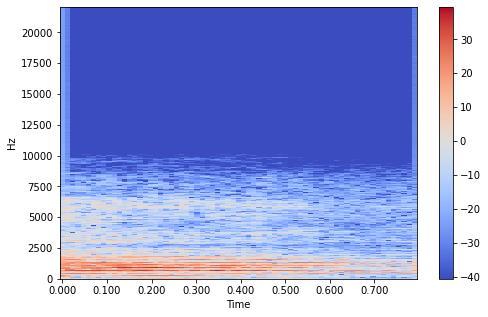

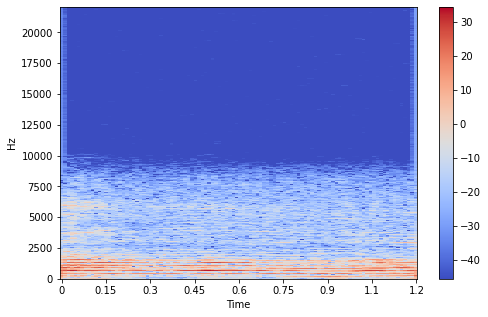

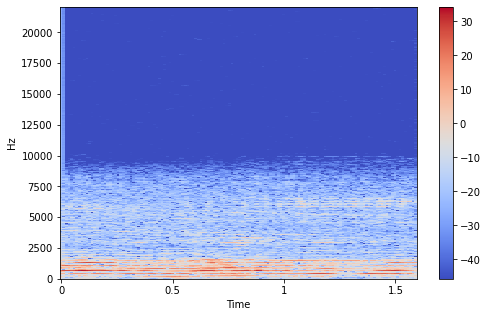

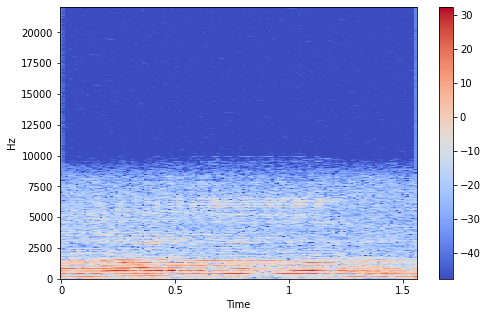

In [6]:
X1 = librosa.stft(x1)
Xdb1 = librosa.amplitude_to_db(abs(X1))
plt.figure(figsize=(8, 5))
librosa.display.specshow(Xdb1, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

X2 = librosa.stft(x2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(8, 5))
librosa.display.specshow(Xdb2, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

X3 = librosa.stft(x3)
Xdb3 = librosa.amplitude_to_db(abs(X3))
plt.figure(figsize=(8, 5))
librosa.display.specshow(Xdb3, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

X4 = librosa.stft(x4)
Xdb4 = librosa.amplitude_to_db(abs(X4))
plt.figure(figsize=(8, 5))
librosa.display.specshow(Xdb4, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

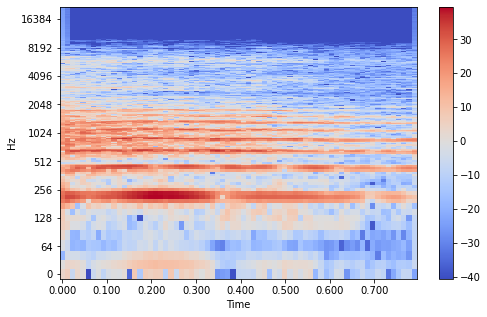

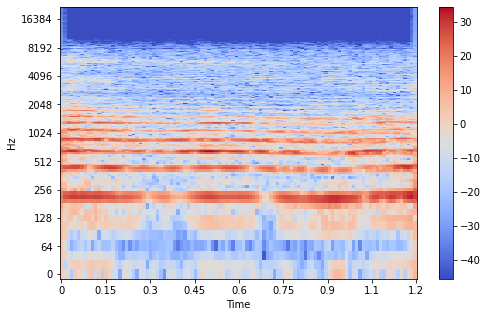

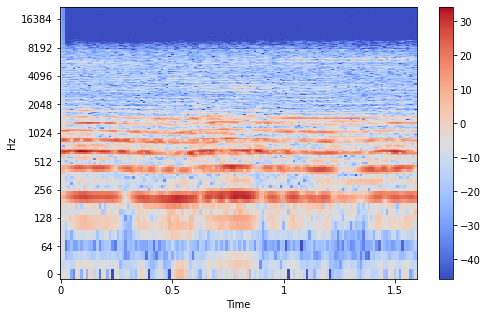

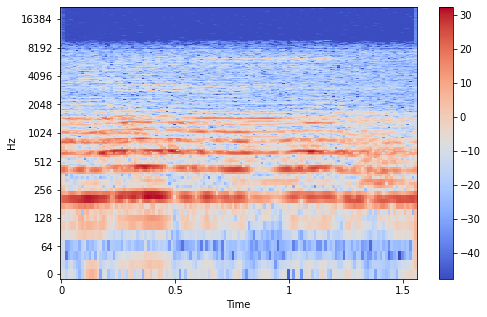

In [7]:
plt.figure(figsize=(8, 5))
librosa.display.specshow(Xdb1, sr=sr, x_axis='time', y_axis='log' )
plt.colorbar()

plt.figure(figsize=(8, 5))
librosa.display.specshow(Xdb2, sr=sr, x_axis='time', y_axis='log' )
plt.colorbar()

plt.figure(figsize=(8, 5))
librosa.display.specshow(Xdb3, sr=sr, x_axis='time', y_axis='log' )
plt.colorbar()

plt.figure(figsize=(8, 5))
librosa.display.specshow(Xdb4, sr=sr, x_axis='time', y_axis='log' )
plt.colorbar()